In [243]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Interconnectedness of GDP and Tertiary Education

Datasource:

https://data.worldbank.org/indicator/SE.TER.CUAT.BA.ZS

https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD

### Processing the Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative) data

In [204]:
#importing data for Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)
edu = pd.read_excel("API_SE.TER.CUAT.BA.ZS_DS2_en_excel_v2_4354574.xls", sheet_name="Data", header=3)
edu.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.06798
3,Africa Western and Central,AFW,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.6339,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
edu.shape

(266, 66)

In [206]:
#dropping columns without any values
edu = edu.dropna(axis=1, how="all")
edu.shape

(266, 36)

In [207]:
#Grabbing the latest datapoints, going back from 2021
edu['latestEduData'] = edu.ffill(axis=1)['2021']

In [208]:
#dropping those rows/countires where there is no educational data available
edu = edu[edu.latestEduData != "SE.TER.CUAT.BA.ZS"]
edu.shape

(130, 37)

In [290]:
#figuring out, from which year is the datapoint coming from for the Edu data
year_list_edu = []
for row in edu.itertuples():
    #print(row)
    values = list(set(row))  # Get the unique values in the row
    equal_columns = []
    for v in values:
        # Column names that have this value
        columns = [edu.columns[i-1] for i, x in enumerate(row) if x == v]
        if len(columns) > 1:
            # If more than 1 column with this value, append to the list
            equal_columns.append(' '.join(columns))
    year_list_edu.append(equal_columns[0].split()[0])

edu["latestEduYear"] = year_list_edu
edu.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1975,1980,1981,1989,1991,...,2014,2015,2016,2017,2018,2019,2020,2021,latestEduData,latestEduYear
254,"Venezuela, RB",VEN,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,21.544649,25.14617,NaN,NaN,NaN,NaN,NaN,25.14617,2016
257,Vietnam,VNM,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.24790,NaN,NaN,10.2479,2019
260,Samoa,WSM,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.93854,2001
263,South Africa,ZAF,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.065220,NaN,8.24519,NaN,8.01776,NaN,NaN,8.01776,2019
265,Zimbabwe,ZWE,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.25141,NaN,NaN,NaN,NaN,3.25141,2017


In [211]:
#creating a smaller, more managable dataframe for the educational data
eduSmall = edu[["Country Name", "Country Code", "Indicator Name", "Indicator Code", "latestEduData", "latestEduYear"]]
eduSmall.head()

,Country Name,Country Code,Indicator Name,Indicator Code,latestEduData,latestEduYear
0,Aruba,ABW,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,12.8243,2010
2,Afghanistan,AFG,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,3.06798,2021
4,Angola,AGO,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,2.6339,2014
5,Albania,ALB,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,12.89966,2012
6,Andorra,AND,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,21.046551,2016


In [212]:
#saving this to a .csv file, just in case we need it later
eduSmall.to_csv("processedEduData.csv", index=False)

### Processing the GDP per capita, PPP (current international $) file

In [213]:
#importing the file
gdp = pd.read_excel('API_NY.GDP.PCAP.PP.CD_DS2_en_excel_v2_4355406.xls', sheet_name="Data", header=3)
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,34632.951649,36830.156611,36782.227117,37314.564389,37587.065942,38893.960556,40143.000266,39834.223903,31182.833881,NaN
1,Africa Eastern and Southern,AFE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3237.872226,3365.684322,3503.826534,3533.336591,3627.474284,3670.891196,3761.035160,3814.846625,3659.272868,3881.592253
2,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1914.774228,2015.514775,2069.424022,2087.305323,1981.118069,2058.400221,2082.392197,2152.190243,2078.479082,NaN
3,Africa Western and Central,AFW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3772.323802,4013.196523,4208.731780,4139.323364,4069.005667,4115.645480,4231.321093,4335.409188,4241.522499,4474.970700
4,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7412.967137,7682.475646,8179.297828,7337.569901,7103.226249,7310.896551,7148.933253,6995.299736,6478.332182,6581.042021


In [214]:
#dropping columns without any datapoints
gdp = gdp.dropna(axis=1, how="all")
gdp.shape

(266, 36)

In [215]:
#finding the latest available GDP data and dropping those countries, which have no GDP data
gdp['LatestGDPData'] = gdp.ffill(axis=1)['2021']
gdp = gdp[gdp.LatestGDPData != "NY.GDP.PCAP.PP.CD"]

In [216]:
#paring the latest GDP data with their respective years
year_list_gdp = []
for row in gdp.itertuples():
    #print(row)
    values = list(set(row))  # Get the unique values in the row
    equal_columns = []
    for v in values:
        # Column names that have this value
        columns = [gdp.columns[i-1] for i, x in enumerate(row) if x == v]
        if len(columns) > 1:
            # If more than 1 column with this value, append to the list
            equal_columns.append(' '.join(columns))
    year_list_gdp.append(equal_columns[0].split()[0])

In [217]:
gdp["latestGDPYear"] = year_list_gdp
gdp.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2014,2015,2016,2017,2018,2019,2020,2021,LatestGDPData,latestGDPYear
261,Kosovo,XKX,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8649.449499,9357.135136,10007.689234,10436.168846,11012.109663,11796.153310,11292.862651,12720.983575,12720.983575,2021
262,"Yemen, Rep.",YEM,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,2066.359511,2161.387825,2271.682332,2297.981613,2388.575291,2470.530068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3688.519409,2013
263,South Africa,ZAF,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,7065.270348,7053.782217,6886.247717,6963.371591,7171.325677,7389.869645,...,13602.102643,13701.945390,13748.461416,13860.270166,14207.432853,14288.589886,13359.484332,14420.174317,14420.174317,2021
264,Zambia,ZMB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1474.092450,1484.633685,1456.044324,1554.151167,1415.550409,1450.023660,...,3539.436390,3430.400287,3404.673990,3485.021780,3605.676095,3616.903819,3457.328102,3623.854913,3623.854913,2021
265,Zimbabwe,ZWE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1771.788573,1888.041180,1721.591128,1750.061859,1923.209711,1940.965561,...,2612.455954,2679.507615,2806.469032,2416.049969,2556.793484,2408.154197,2251.455674,2444.478237,2444.478237,2021


In [219]:
#creating a smaller GDP dataframe
gdpSmall = gdp[["Country Name", "Country Code", "Indicator Name", "Indicator Code", "LatestGDPData", "latestGDPYear"]]
gdpSmall.head()

,Country Name,Country Code,Indicator Name,Indicator Code,LatestGDPData,latestGDPYear
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,31182.833881,2020
1,Africa Eastern and Southern,AFE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,3881.592253,2021
2,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,2078.479082,2020
3,Africa Western and Central,AFW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,4474.9707,2021
4,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,6581.042021,2021


In [220]:
#merging them together, so we only have those countries, which have both GDP and educational data available
df = pd.merge(eduSmall, gdpSmall, how="left", on=["Country Code"])
df = df[df['latestGDPYear'].notna()]


In [222]:
df.shape

(127, 11)

# Data Exploration

In [223]:
#calculating whats the difference in years betwwen the latest GDP and latest educational data
#we don't want to have great difference between the GDP and the educational data
df["dataDiff"] = df["latestGDPYear"].astype("int") - df["latestEduYear"].astype("int")

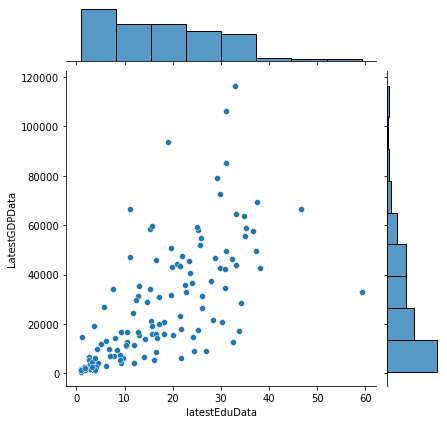

In [227]:
#let's see if there is indeed a connection between the data
sns.jointplot(data=df, x="latestEduData", y="LatestGDPData")

It seems like GDP and attainment of Bachelors is indeed connected in some way, but we also see some outlier values.

In [228]:
#let's check the datatypes.
df.dtypes

Country Name_x      object
Country Code        object
Indicator Name_x    object
Indicator Code_x    object
latestEduData       object
latestEduYear       object
Country Name_y      object
Indicator Name_y    object
Indicator Code_y    object
LatestGDPData       object
latestGDPYear       object
dataDiff             int32
dtype: object

In [229]:
#let's quickly convert the data to it's correct forms, so we can take a look at the outliers
df = df.astype({'latestEduData': 'float', 'latestEduYear': 'int', 'LatestGDPData': 'float', 'latestGDPYear': 'int'})

In [230]:
#running some summary statistics
df.describe()

,latestEduData,latestEduYear,LatestGDPData,latestGDPYear,dataDiff
count,127.000000,127.000000,127.000000,127.000000,127.000000
mean,17.235833,2016.590551,27371.685798,2020.787402,4.196850
std,11.731061,4.598748,24121.328963,1.058825,4.636021
min,0.851180,2000.000000,793.236434,2011.000000,-5.000000
25%,7.256395,2015.000000,7180.776229,2021.000000,1.000000
50%,15.760020,2019.000000,19209.492439,2021.000000,2.000000
75%,25.844765,2020.000000,43282.539234,2021.000000,5.500000
max,59.260880,2021.000000,116486.473211,2021.000000,21.000000


There is a huge difference between the mean and median for the dataDiff (difference of GDP and educational datapoint). The maximum value is 21 years, which is too much. 

We will want to get rid of the upper 1 percentile of difference values.

In [231]:
#let's see the data of the upper percentile od year difference
upperValueDataDiff = np.percentile(df.dataDiff, [90])[0]
df[(df.dataDiff > upperValueDataDiff)]

,Country Name_x,Country Code,Indicator Name_x,Indicator Code_x,latestEduData,latestEduYear,Country Name_y,Indicator Name_y,Indicator Code_y,LatestGDPData,latestGDPYear,dataDiff
16,"Bahamas, The",BHS,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,15.227880,2010,"Bahamas, The","GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,34107.849831,2021,11
23,Barbados,BRB,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,1.058230,2000,Barbados,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,14816.862861,2021,21
28,China,CHN,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,3.577650,2010,China,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,19338.234085,2021,11
39,Dominica,DMA,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,5.033870,2001,Dominica,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,11973.867909,2021,20
66,Japan,JPN,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,19.913139,2010,Japan,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,42940.405252,2021,11
68,Kyrgyz Republic,KGZ,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,16.202591,2009,Kyrgyz Republic,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,5287.790670,2021,12
86,Nigeria,NGA,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,9.038490,2006,Nigeria,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,5459.158598,2021,15
101,Russian Federation,RUS,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,59.260880,2010,Russian Federation,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,32803.355469,2021,11
106,Sierra Leone,SLE,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,0.851180,2004,Sierra Leone,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1816.170271,2021,17
116,Chad,TCD,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,0.864160,2009,Chad,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1590.552990,2021,12


It seems like our cutoff value will be 10 years.

In [234]:
#removing those countries where the GDP and educational value are more than 10 years apart
result = df[df['dataDiff'] < 10]
result.shape

(108, 12)

In [235]:
result.describe()

,latestEduData,latestEduYear,LatestGDPData,latestGDPYear,dataDiff
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,18.364161,2018.148148,29027.381195,2020.759259,2.611111
std,11.165358,2.383019,24838.174089,1.142798,2.331553
min,0.908620,2008.000000,793.236434,2011.000000,-5.000000
25%,9.305255,2017.000000,9097.366939,2021.000000,1.000000
50%,17.625794,2019.000000,20725.212765,2021.000000,2.000000
75%,27.120457,2020.000000,45542.339401,2021.000000,4.000000
max,46.631458,2021.000000,116486.473211,2021.000000,9.000000


Seems like out mean difference is 2,6 and the median is 2, while 75% of the values are no more then 4 years apart.

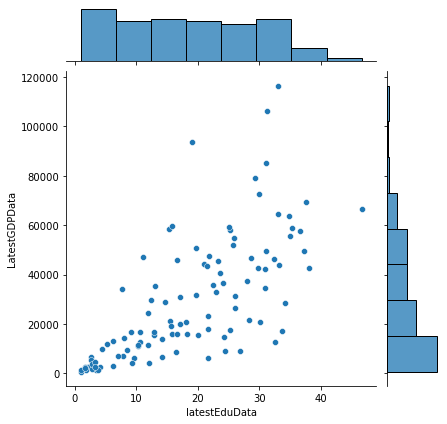

In [236]:
#the plot shows less outlier values, but also shows strong skew
sns.jointplot(data=result, x="latestEduData", y="LatestGDPData")

I also wanted to look at the upper one percentile of the GDP and Educational data.

In [239]:
upperValueGDP = np.percentile(result.LatestGDPData, [99])[0]
result[(result.LatestGDPData > upperValueGDP)]

,Country Name_x,Country Code,Indicator Name_x,Indicator Code_x,latestEduData,latestEduYear,Country Name_y,Indicator Name_y,Indicator Code_y,LatestGDPData,latestGDPYear,dataDiff
60,Ireland,IRL,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,31.161921,2017,Ireland,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,106455.753026,2021,4
105,Singapore,SGP,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,32.977989,2020,Singapore,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,116486.473211,2021,1


In [240]:
upperValueEDU = np.percentile(result.latestEduData, [99])[0]
result[(result.latestEduData > upperValueEDU)]

,Country Name_x,Country Code,Indicator Name_x,Indicator Code_x,latestEduData,latestEduYear,Country Name_y,Indicator Name_y,Indicator Code_y,LatestGDPData,latestGDPYear,dataDiff
5,United Arab Emirates,ARE,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,46.631458,2019,United Arab Emirates,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,66766.053932,2020,1
71,Lithuania,LTU,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,38.103458,2020,Lithuania,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,42665.322931,2021,1


Let's see that would a correlaction matrix show: the correlation between the GDP and the percentage of people with at least a Bachelor's degree is 0,7

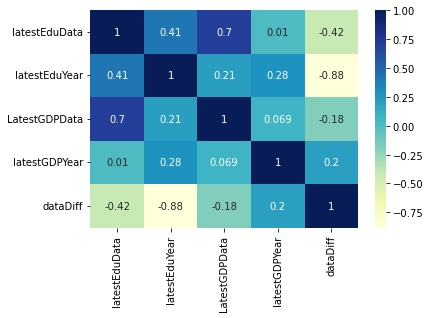

In [244]:
sns.heatmap(result.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Regression Analysis

### Let's look at a simple linear regression model to see if our findings are statistically significant

In [273]:
#assigning the X and y values
X = result['LatestGDPData']
y = result['latestEduData']

In [274]:
#splitting the data to train and test portions
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [275]:
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [277]:
# Fitting the resgression line using 'OLS' model
5306
lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const            8.743304
LatestGDPData    0.000357
dtype: float64

In [278]:
# Let's see the summary statistics of the linear regression model
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          latestEduData   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     72.12
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           1.67e-12
Time:                        14:47:59   Log-Likelihood:                -262.22
No. Observations:                  75   AIC:                             528.4
Df Residuals:                      73   BIC:                             533.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.7433      1.476      5.924      0.000       5.802      11.685
LatestGDPData     0.0004    4.2e-05      8.492      0.000       0.000       0.000
==============================================================================
Omnibus:                        3.150   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.207   Jarque-Bera (JB):                3.093
Skew:                           0.455   Prob(JB):                        0.213
Kurtosis:                       2.599   Cond. No.                     5.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The coefficient is 0.0004, and its corresponding p-value is 0. That means the coefficient is statistically significant.
R-squared value is 0.497, which means that 49.7% of the educational data's variance can be explained by the GDP.

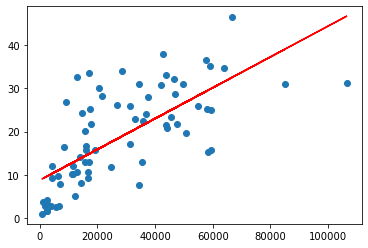

In [279]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 8.743304 + 0.000357*X_train, 'r')
plt.show()

In [280]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Residual Analysis

One of the major assumptions of the linear regression model is the error terms are normally distributed.

c:\Users\sznik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


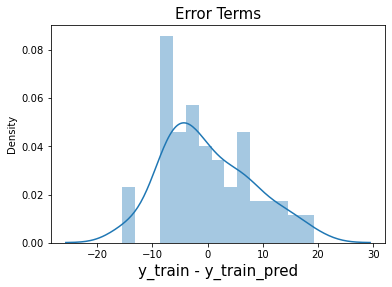

In [281]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

As we can see, the residuals are NOT following the normal distribution graph and the mean is NOT 0.

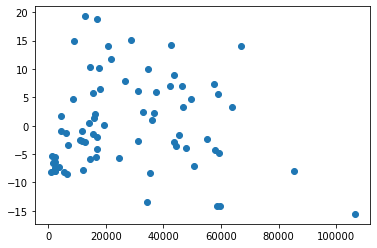

In [282]:
plt.scatter(X_train,res)
plt.show()

The residuals are not following any specific pattern

In [ ]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

In [284]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.4359918576583225

Since the R² value on test data is within 5% of the R² value on training data, we can conclude that the model is pretty stable. Which means, what the model has learned on the training set can generalize on the unseen test set.

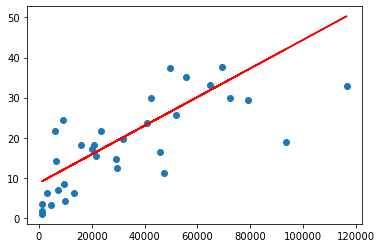

In [285]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [291]:
#saving the dataset to a csv file for later use
result.to_csv("ProcessedData.csv", index=False)